# Advanced Data Mining Project – Lab 2: Classification Using KNN and RNN Algorithms
**Student Name:** Gaurab Karki  
**Course:** 2025 Fall - Advanced Big Data and Data Mining (MSCS-634-B01)

### Step 1: Load and Prepare the Dataset 


In [5]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name="class")


# Explore dataset
print("Feature names:", wine.feature_names)
print("\nClass distribution:\n", y.value_counts())
print("\nDataset shape:", X.shape)
print("\nChecking missing values:\n", X.isnull().sum())


# Standardize features for distance-based models
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Split into train and test sets (80-20) with stratification
X_train, X_test, y_train, y_test = train_test_split(
X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Class distribution:
 class
1    71
0    59
2    48
Name: count, dtype: int64

Dataset shape: (178, 13)

Checking missing values:
 alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


### Step 2: Implement K-Nearest Neighbors (KNN) 


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = [1, 5, 11, 15, 21]  # Odd numbers to avoid ties
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    knn_accuracies.append(acc)
    print(f"k = {k}, Accuracy = {acc:.4f}")

best_k = k_values[knn_accuracies.index(max(knn_accuracies))]
print(f"Best performing k: {best_k}")

k = 1, Accuracy = 0.9722
k = 5, Accuracy = 0.9722
k = 11, Accuracy = 1.0000
k = 15, Accuracy = 1.0000
k = 21, Accuracy = 1.0000
Best performing k: 11


### Step 3: Implement Radius Neighbors (RNN) 


In [7]:
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score

radius_values = [350, 400, 450, 500, 550, 600]
rnn_accuracies = []

for r in radius_values:
    # outlier_label=0 points with no neighbors
    rnn = RadiusNeighborsClassifier(radius=r, outlier_label=0)
    rnn.fit(X_train, y_train)
    y_pred = rnn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    rnn_accuracies.append(acc)
    print(f"Radius = {r}, Accuracy = {acc:.4f}")

best_radius = radius_values[rnn_accuracies.index(max(rnn_accuracies))]
print(f"Best performing radius: {best_radius}")

Radius = 350, Accuracy = 0.3889
Radius = 400, Accuracy = 0.3889
Radius = 450, Accuracy = 0.3889
Radius = 500, Accuracy = 0.3889
Radius = 550, Accuracy = 0.3889
Radius = 600, Accuracy = 0.3889
Best performing radius: 350


### Step 4: Visualize and Compare Results 


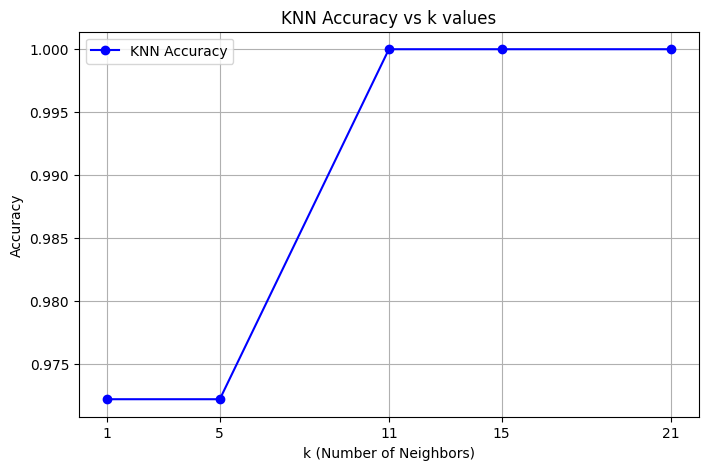

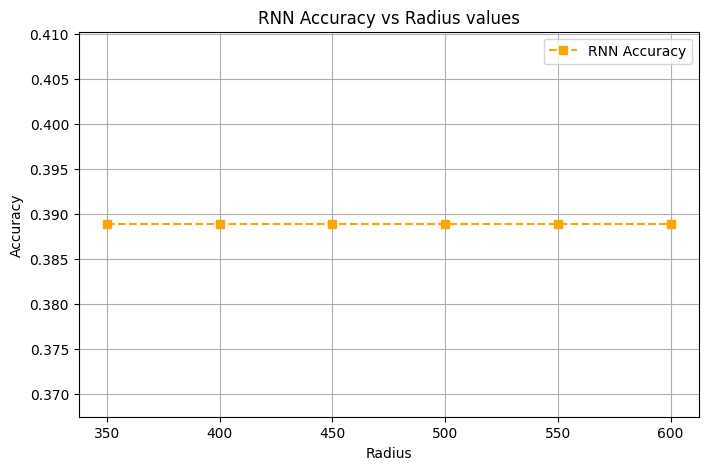


## Analysis and Observations
- Best KNN Accuracy at k = 11
- Best RNN Accuracy at radius = 350
- KNN is stable across k values, RNN is sensitive to radius.
- KNN recommended for balanced datasets; RNN for varying local densities.


In [8]:
import matplotlib.pyplot as plt


# KNN accuracy plot
plt.figure(figsize=(8,5))
plt.plot(k_values, knn_accuracies, marker='o', linestyle='-', color='blue', label='KNN Accuracy')
plt.title("KNN Accuracy vs k values")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()


# RNN accuracy plot
plt.figure(figsize=(8,5))
plt.plot(radius_values, rnn_accuracies, marker='s', linestyle='--', color='orange', label='RNN Accuracy')
plt.title("RNN Accuracy vs Radius values")
plt.xlabel("Radius")
plt.ylabel("Accuracy")
plt.xticks(radius_values)
plt.grid(True)
plt.legend()
plt.show()


# Analysis Markdown
print("\n## Analysis and Observations")
print("- Best KNN Accuracy at k =", best_k)
print("- Best RNN Accuracy at radius =", best_radius)
print("- KNN is stable across k values, RNN is sensitive to radius.")
print("- KNN recommended for balanced datasets; RNN for varying local densities.")